<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W1D4_Paleoclimate/student/W1D4_Tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D4_Paleoclimate/student/W1D4_Tutorial7.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D4_Paleoclimate/student/W1D4_Tutorial7.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Bonus Tutorial 7: Assessing Climate Forcings
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Yosmely Bermúdez, Dionessa Biton, Katrina Dobson, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Brodie Pearson, Jenna Pearson, Mauro Tripaldi, Chi Zhang, Ohad Zivan

**Content editors:** Yosmely Bermúdez, Paul Heubel, Zahra Khodakaramimaghsoud, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 25 minutes

In this tutorial, you will use data analysis tools and climate concepts you've learned today, and on previous days, to assess the forcings of climate variations observed in paleoclimate records.

By the end of this tutorial you will be able to:

*   Plot and interpret temperature reconstructions from speleothem oxygen isotopes
*   Generate and plot time series of solar insolation
*   Assess the orbital forcings on monsoon intensity over the past 400,000 years using spectral analysis

# Setup

In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

!pip install pyleoclim
!pip install climlab

# you may get errors about fortran extensions not working, and that is ok we are not using those here
# in W1D5 you will learn how to install climlab in colab using conda which will fix these errors and give you
# full functionality of the package

In [2]:
# imports

# for Google Colab users: you might get a numpy.dtype error here, restart your session and rerun the code and it should solve it.
import pooch
import os
import tempfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyleoclim as pyleo

from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D4_T7"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [5]:
# @title Helper functions

def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W1D4_Paleoclimate"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [6]:
# @title Video 1: Interpreting Climate Forcings

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'ELBOupIFjWw'), ('Bilibili', 'BV1N14y1d7L9')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [7]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Interpreting_Climate_Forcings_Video")

In [8]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "ztfwk"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/ztfwk/


In [9]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Interpreting_Climate_Forcings_Slides")

# Section 1: Understanding Climate Forcings

A common task in paleoclimatology is to relate a proxy record (or several of them) to the particular forcing(s) that is thought to dominate that particular record (e.g., based on the proxy, location, etc.). We've already spent some time in earlier tutorials learning about the influence of Earth's orbital configuration on glacial-interglacial cycles. In this tutorial, we'll assess the climate forcings of monsoon intensity over the past 400,000 years.

Recall from the video that monsoons are seasonal changes in the direction of the strongest wind and precipitation that are primarily driven by variations in seasonal insolation. Land and the ocean have different abilities to hold onto heat. Land cools and warms much faster than the ocean does due to high heat capacity. This temperature difference leads to a pressure difference that drives atmospheric circulations called monsoons.

*   **Summer (Northern Hemisphere)**: the land is warmer than the ocean, so the winds blow towards the land, resulting in heavy rainfall over land.
*   **Winter (Northern Hemisphere)**: the land is cooler than the ocean, so the winds blow away from the land, resulting in heavy rainfall over the ocean and decreased rainfall over land.

On longer timescales, changes in insolation and the mean climate state can drive changes in monsoon intensity. To assess these long-term changes, we can analyze paleoclimate reconstructions from monsoon regions such as India, Southeast Asia or Africa.  δ<sup>18</sup>O records from speleothems in Chinese caves are broadly interpreted to reflect continental-scale monsoon circulations.

In this tutorial, we'll plot and analyze a composite of three δ<sup>18</sup>O speleothem records from multiple caves in China (Sanbao, Hulu, and Dongge caves) from [Cheng et al. (2016)](https://hwww.nature.com/articles/nature18591). We will then assess the relationship between the climate signals recorded by the speleothem δ<sup>18</sup>O and solar insolation.

First, we can download and plot the speleothem oxygen isotope data:

SHA256 hash of downloaded file: 79755093d2b1fcfe888f141cbd36d112bbe38ab002c722ad2c391b387b0d0743
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$\\delta^{18}$O [‰]'>)

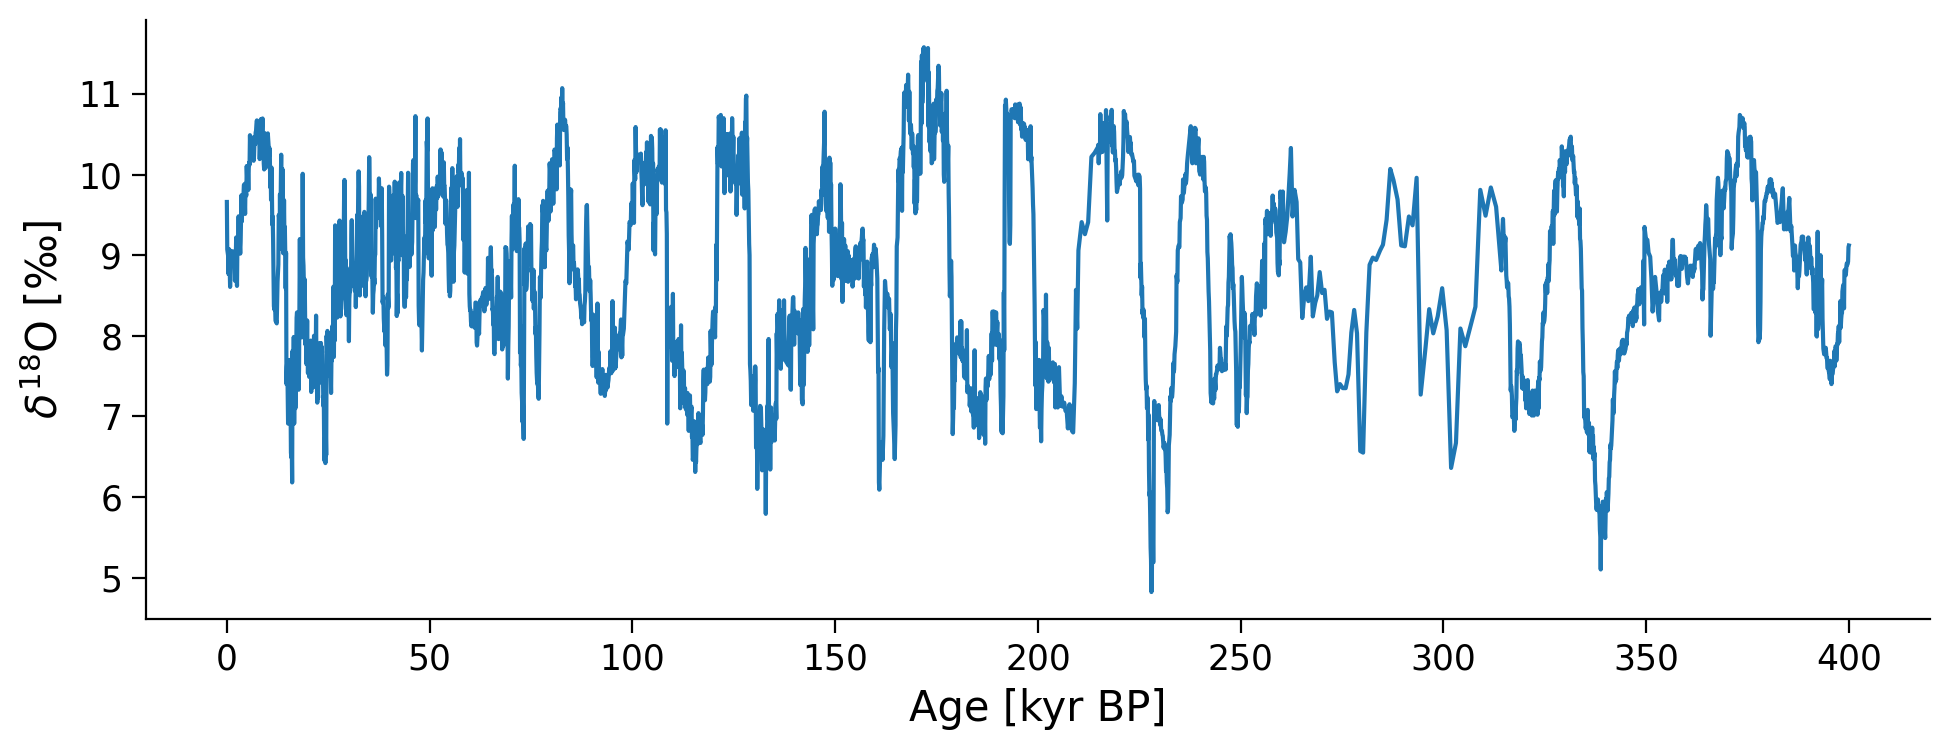

In [10]:
# download the data from the url
filename_Sanbao_composite = "Sanbao_composite.csv"
url_Sanbao_composite = "https://raw.githubusercontent.com/LinkedEarth/paleoHackathon/main/data/Orbital_records/Sanbao_composite.csv"
data = pd.read_csv(
    pooch_load(filelocation=url_Sanbao_composite, filename=filename_Sanbao_composite)
)

# create a pyleo.Series
d18O_data = pyleo.Series(
    time=data["age"] / 1000,
    time_name="Age",
    time_unit="kyr BP",
    value=-data["d18O"],
    value_name=r"$\delta^{18}$O",
    value_unit="\u2030",
)
d18O_data.plot()

You may notice that in the figure we just made, the δ<sup>18</sup>O values on the y-axis is plotted with more positive values up, whereas in previous tutorials, we've plotted isotopic data with more negative values up (since more negative/"depleted" suggests warmer temperatures or increased rainfall). However, the pre-processed δ<sup>18</sup>O data that we're using in this tutorial was multipled by -1, so now a more positive/"enriched" value suggests warmer temperatures or increased rainfall. In other words, in this figure, upward on the y-axis is increased monsoon intensity and downward on the y-axis is decreased monsoon intensity.

Let's apply what we learned in the previous tutorial to perform spectral analysis on the speleothem oxygen isotope data. Recall from the previous tutorial that spectral analysis can help us identify dominant cyclicities in the data, which can be useful for assessing potential climate forcings.

Here we'll use the Weighted Wavelet Z-Transform (WWZ) method you learned about in the previous tutorial:

In [11]:
# standardize the data
d18O_stnd = d18O_data.interp(step=0.5).standardize()  # save it for future use

In [12]:
# calculate the WWZ spectral analysis
d18O_wwz = d18O_stnd.spectral(method="wwz")

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [kyr]', ylabel='PSD'>)

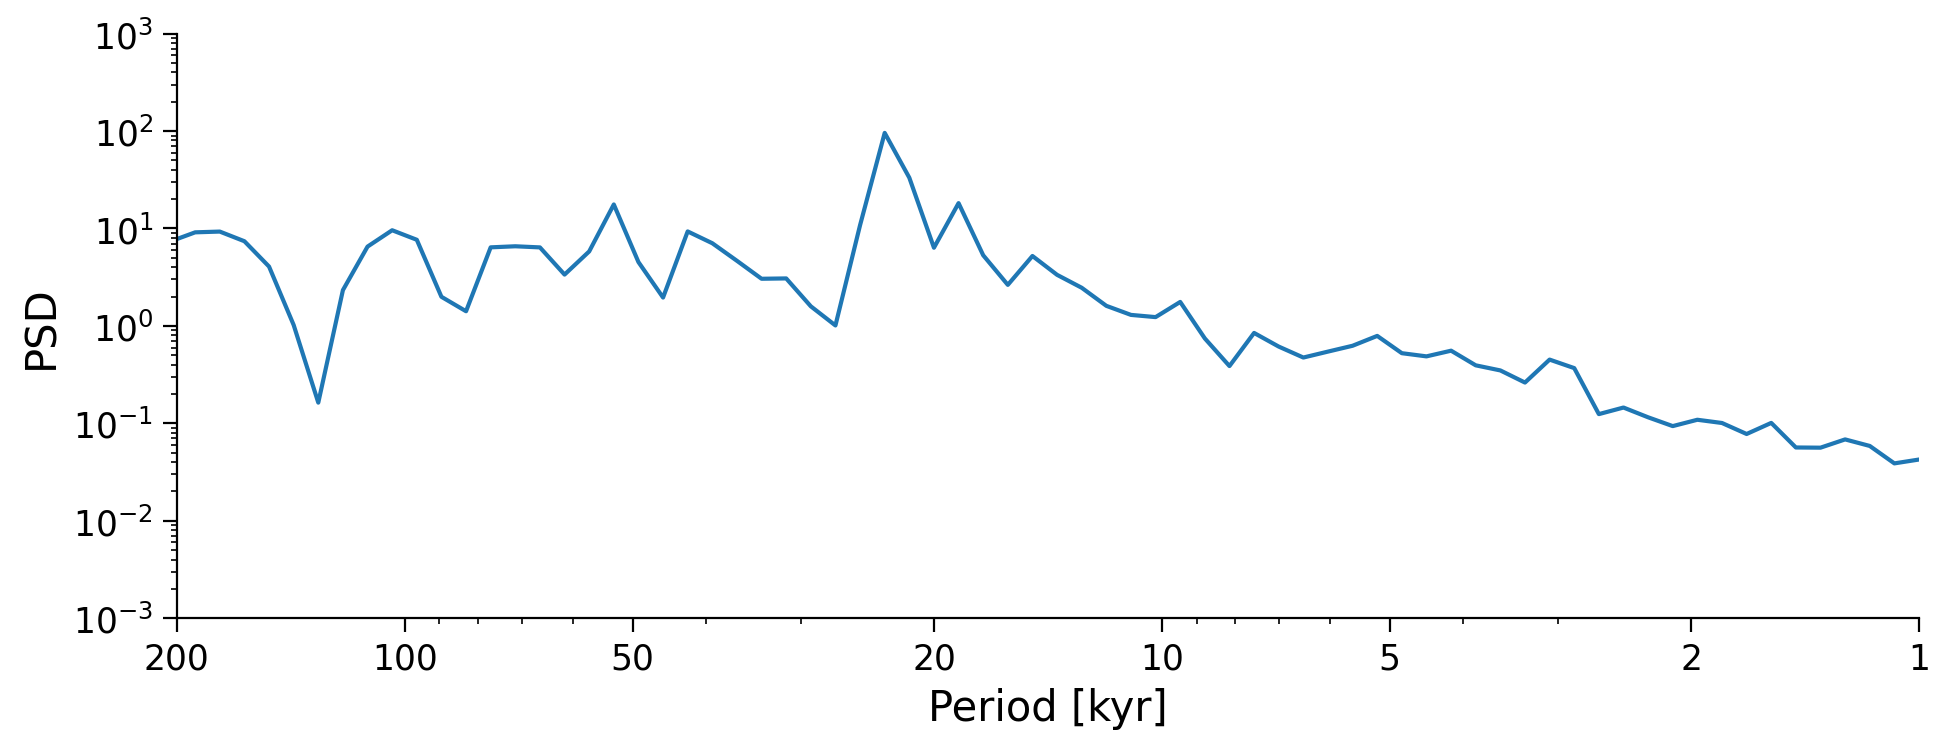

In [13]:
# plot WWZ results
d18O_wwz.plot(xlim=[100, 5], ylim=[0.001, 1000])

## Coding Exercises 1

1. The dominant spectral power is at ~23,000 years. This suggests a link between monsoon intensity and orbital precession! Is this peak significant? Use the skills you learned in the last tutorial to test the significance of this peak at the 95% confidence level. For this exercise, input `number = 30` as the default value which will take a long time to run.

In [14]:
# perform significance test with 5 surrogates
d18O_wwz_sig = ...

# plot the results
_ = ...

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D4_Paleoclimate/solutions/W1D4_Tutorial7_Solution_9d3f401b.py)

*Example output:*

<img alt='Solution hint' align='left' width=974.0 height=375.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D4_Paleoclimate/static/W1D4_Tutorial7_Solution_9d3f401b_8.png>



In [15]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercises_1")

# Section 2: Constructing Insolation Curves

To further explore and confirm the relationship between monsoon intensity and orbital precession, let's take a look at insolation data and compare this to the speleothem δ<sup>18</sup>O records from Asia. Recall that insolation is controlled by variations in Earth's orbital cycles (eccentricity, obliquity, precession), so by comparing the δ<sup>18</sup>O record to insolation, we can assess the influence of orbital variations on δ<sup>18</sup>O and monsoon intensity.

To compute solar insolation, we can use the package [`climlab`](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose. Let's create a time series over the past 400,000 years of changes in summer insolation at 31.67ºN, which is the latitude of Sanbao, one of the caves from which the speleothem records were produced.

In [16]:
# specify time interval and units
kyears = np.linspace(-400, 0, 1001)

# subset of orbital parameters for specified time
orb = OrbitalTable.interp(kyear=kyears)
days = np.linspace(0, const.days_per_year, 365)

# generate insolation at Sanbao latitude (31.67)
Qsb = daily_insolation(31.67, days, orb)

# julian days 152-243 are JJA
Qsb_jja = np.mean(Qsb[:, 151:243], axis=1)

Now we can store this data as a `Series` in Pyleoclim and plot the data versus time:

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ky BP]', ylabel='JJA Insolation [$W.m^{-2}$]'>)

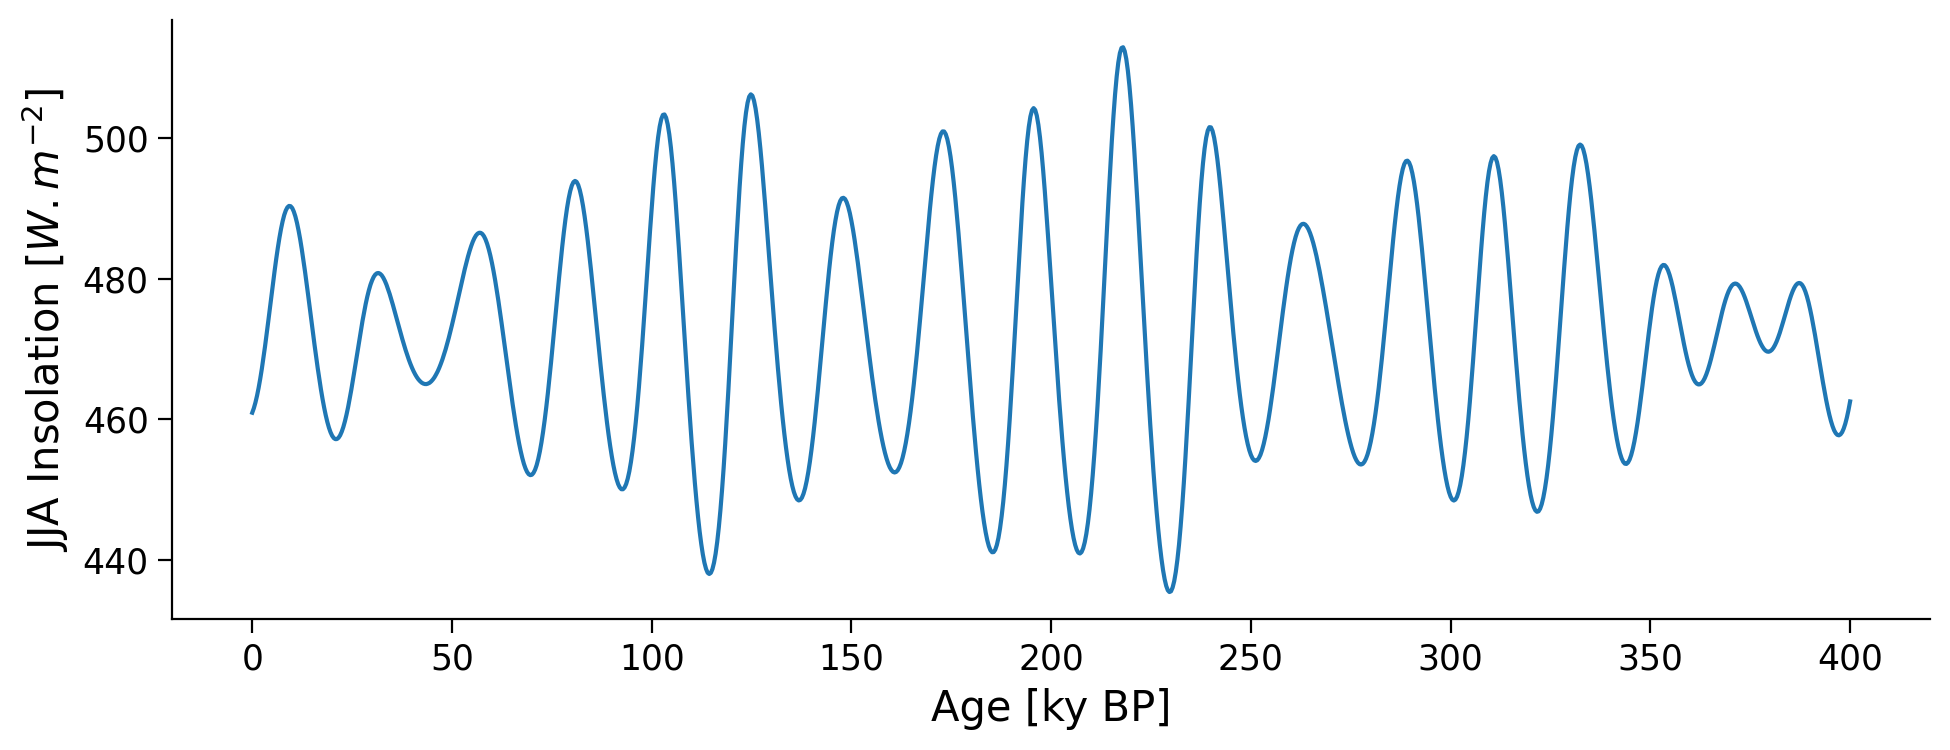

In [17]:
ts_qsb = pyleo.Series(
    time=-kyears,
    time_name="Age",
    time_unit="ky BP",
    value=Qsb_jja,
    value_name="JJA Insolation",
    value_unit=r"$W.m^{-2}$",
)

ts_qsb.plot()

Next, let's plot and compare the speleothem δ<sup>18</sup>O data and the solar insolation data:

(<Figure size 800x600 with 3 Axes>,
 {0: <Axes: ylabel='$\\delta^{18}$O [‰]'>,
  1: <Axes: ylabel='JJA Insolation [$W.m^{-2}$]'>,
  'x_axis': <Axes: xlabel='Age [ka]'>})

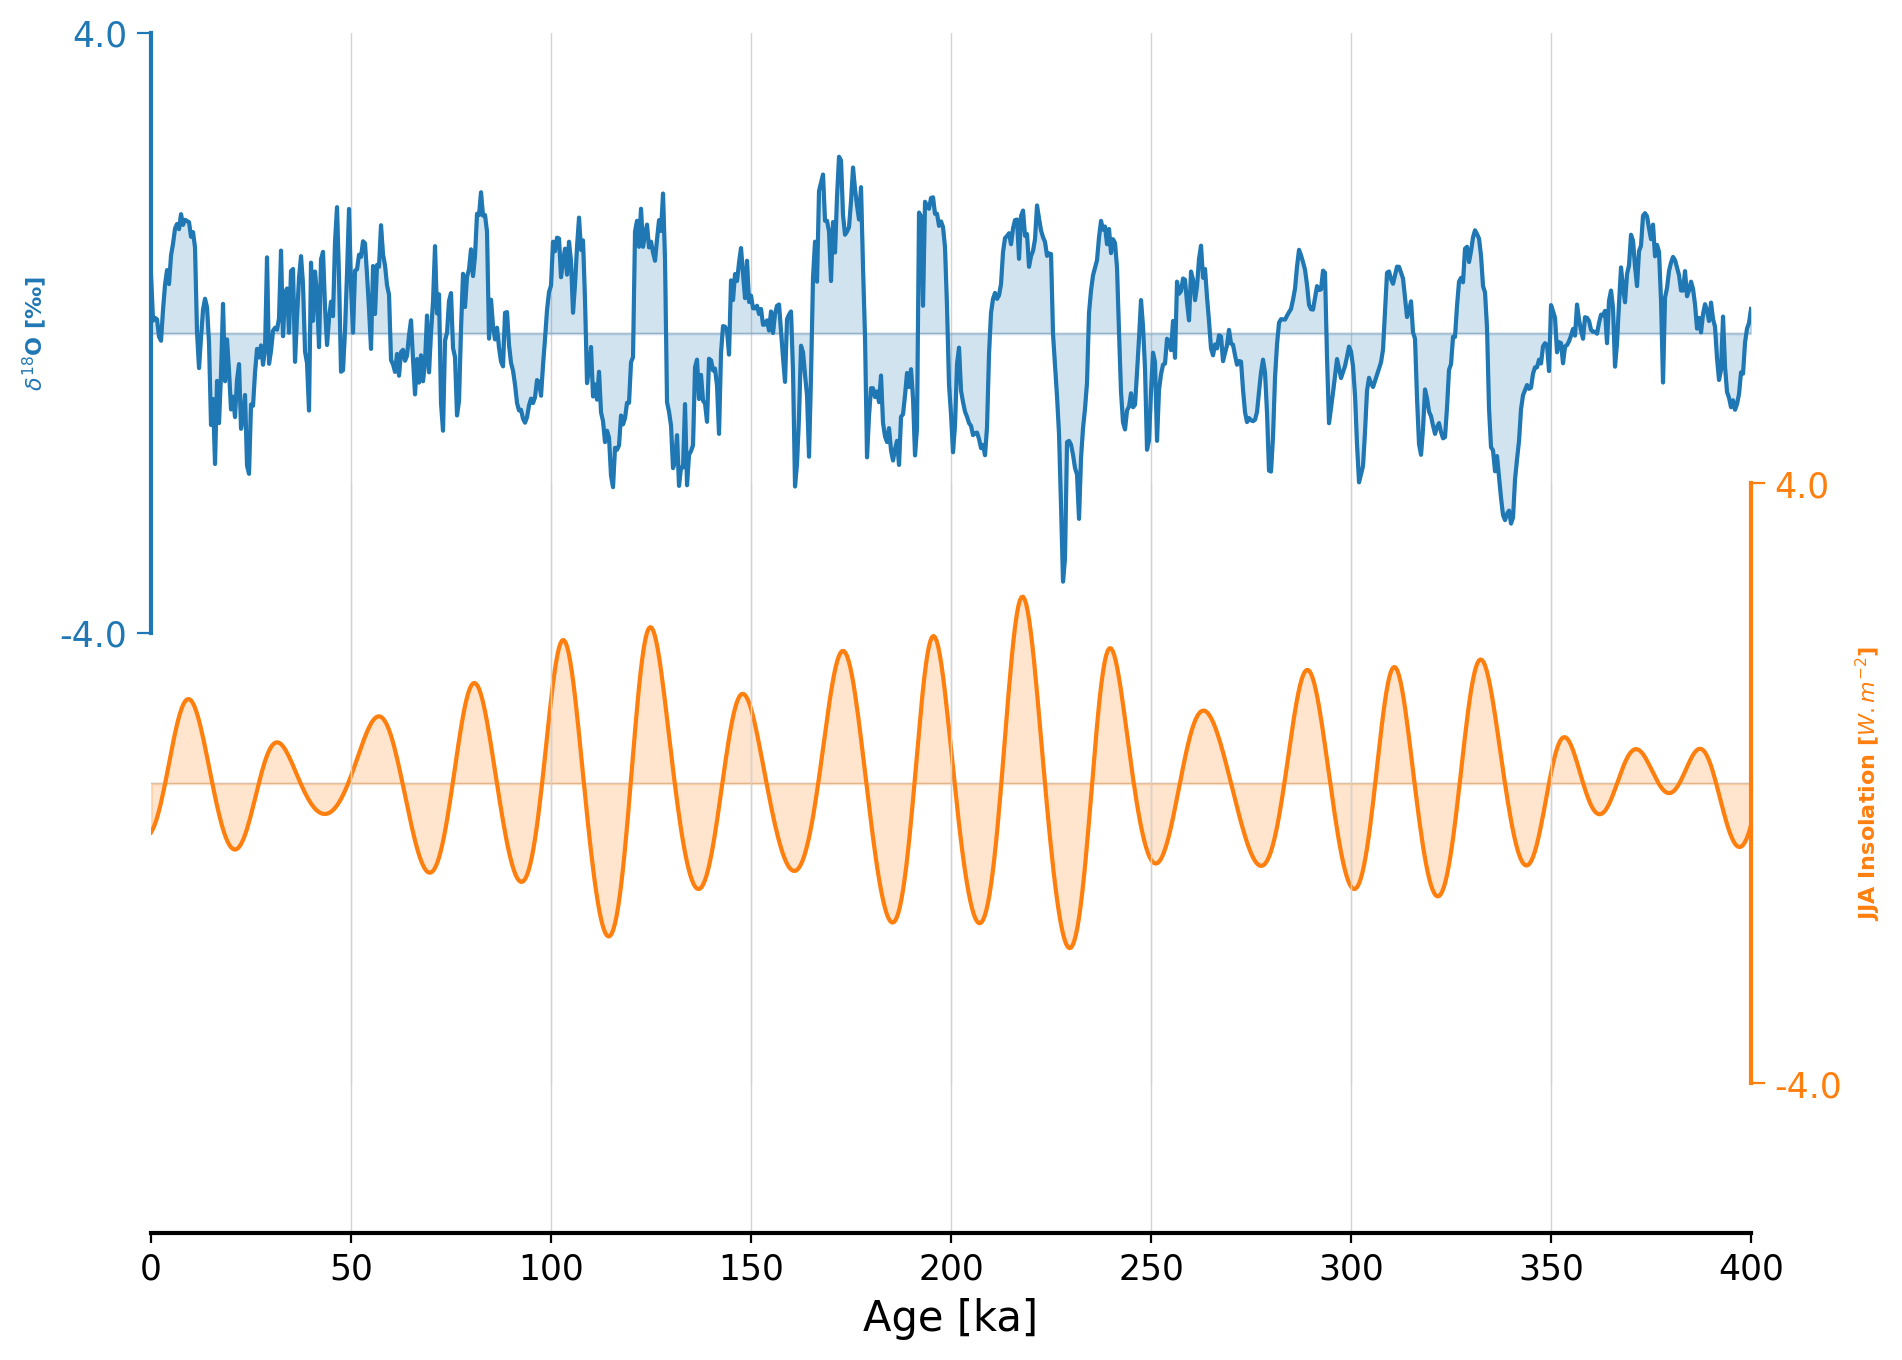

In [18]:
# standardize the insolation data
ts_qsb_stnd = ts_qsb.standardize()

# create a MultipleSeries of the speleothem d18O record and insolation data
compare = [d18O_stnd, ts_qsb_stnd]
ms_compare = pyleo.MultipleSeries(compare, time_unit="kyr BP", name=None)

# create a stackplot to compare the data
ms_compare.stackplot()

By visually comparing the time series of the two records, we can see similarites at orbital scales. To confirm this, we can use spectral analysis to determine the dominant spectral power of the insolation data:

In [19]:
# calculate the WWZ spectral analysis
psd_wwz = ts_qsb_stnd.spectral(method="wwz")

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [ky]', ylabel='PSD'>)

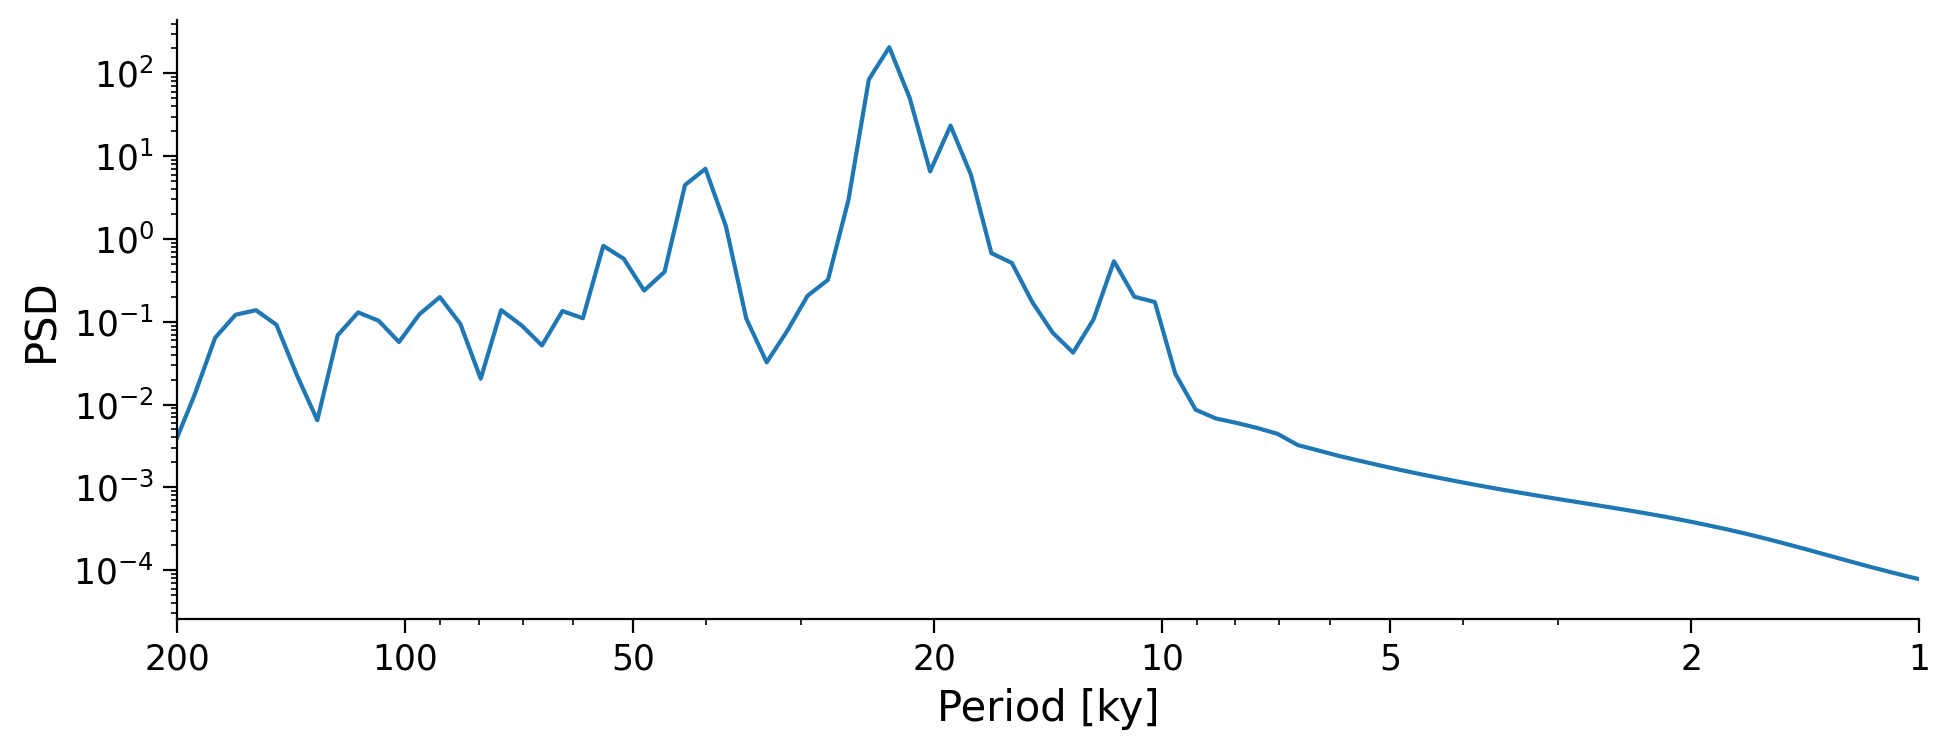

In [20]:
psd_wwz.plot()

## Questions 2: Climate Connection

1. What is the dominant spectral power in summer insolation at 31ºN latitude? How does this compare to the speleothem data?
2. Why might there be a relationship between solar insolation and monsoon intensity? What does the common spectral power in both the insolation and δ<sup>18</sup>O records suggest about the climate forcings driving monsoon intensity in this region?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D4_Paleoclimate/solutions/W1D4_Tutorial7_Solution_f88c4da6.py)



In [21]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2")

# Summary

In this tutorial, you've gained valuable insights into the complex world of paleoclimatology and climate forcings. Here's a recap of what you've learned:
* You've discovered how to plot and interpret temperature reconstructions derived from speleothem oxygen isotopes.
* You've assessed the likely impact of orbital forcings on monsoon intensity over the past 400,000 years using spectral analysis.
* By comparing the δ<sup>18</sup>O record to insolation, you've developed a deeper understanding of the relationship between solar insolation and monsoon intensity.

# Resources

Code for this tutorial is based on an existing notebook from LinkedEarth that explore [forcing and responses in paleoclimate data](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb04_Forcing%26Response.ipynb).

Data from the following sources are used in this tutorial:

*   Cheng, H., Edwards, R., Sinha, A. et al. The Asian monsoon over the past 640,000 years and ice age terminations. Nature 534, 640–646 (2016). https://doi.org/10.1038/nature18591